# How To Measure Your Skill As A Portfolio Manager With The Information Ratio


Active money managers are paid based on their performance against a benchmark like the S&P 500 or Nasdaq. The information ratio is a single number that measures their performance against that benchmark. The higher the information ratio, the better the skill.

You can use the information ratio the same way the professionals do.

Here’s why you might want to.



## You May Be Better Off Investing In The Benchmark
Actively managing a portfolio takes time and costs money. Investing in an ETF tracking a benchmark takes no time and costs very little money. The information ratio can tell you if you’re doing better than the benchmark.

Here's what we'll do:

1. How to get stock price data
2. How to construct a simple portfolio
3. How to compute the information ratio
4. How to compare your portfolio to the benchmark

## Step 1: Get The Data
Start by importing the libraries and getting the data. You can use yfinance for getting stock data.

In [1]:
import pandas as pd
from openbb_terminal.sdk import openbb

With yfinance, you can download prices for more than one stock at a time. Grab data for QQQ, AAPL, and AMZN.



In [2]:
prices = openbb.economy.index(["QQQ", "AAPL", "AMZN"], start_date="2020-01-01", end_date="2022-07-31")

In [3]:
benchmark_returns = prices.QQQ.pct_change()

## Step 2: Construct A Simple Portfolio
To make the analysis more interesting, create a simple portfolio of 50 shares of AAPL and 50 shares of AMZN.

In [4]:
# construct a simple portfolio of equal shares
aapl_position = prices.AAPL * 50
amzn_position = prices.AMZN * 50

Next figure out the portfolio returns and plot them against the benchmark returns.

In [5]:
# compute the portfolio value over time
portfolio_value = aapl_position + amzn_position

# compute the portfolio daily pnl
portfolio_pnl = (
    (aapl_position - aapl_position.shift()) 
    + (amzn_position - amzn_position.shift())
)

# compute the portfolio daily return
portfolio_returns = (portfolio_pnl / portfolio_value)
portfolio_returns.name = "Port"

# create cumulative returns
portfolio_cumulative_returns = (portfolio_returns.fillna(0.0) + 1).cumprod()
benchmark_cumulative_returns = (benchmark_returns.fillna(0.0) + 1).cumprod()

To figure out portfolio returns, first, figure out the daily portfolio value. Then, how much money you made or lost. By dividing the daily profit or loss by the daily portfolio value, you get that day’s return.

The last line adds a name to the series for the plot label.

<AxesSubplot:xlabel='Date'>

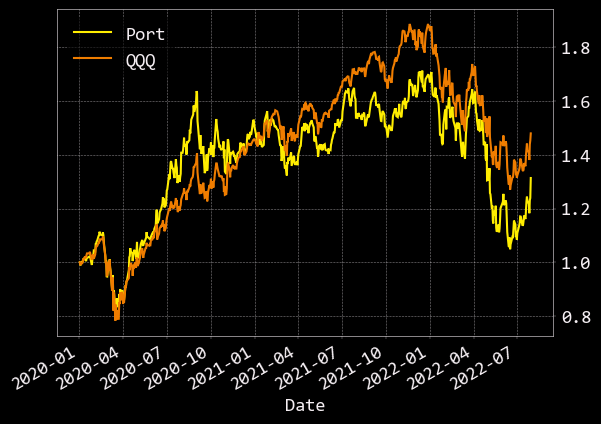

In [6]:
# plot the cumulative portfolio v. benchmark returns
portfolio_cumulative_returns = (portfolio_returns.fillna(0.0) + 1).cumprod()
benchmark_cumulative_returns = (benchmark_returns.fillna(0.0) + 1).cumprod()

pd.concat([portfolio_cumulative_returns, benchmark_cumulative_returns], axis=1).plot()

To create cumulative returns, add 1 to the daily returns and use the cumulative product method. The concat method puts the two series together. That way you can plot the portfolio and benchmark cumulative returns together.

## Step 3: Build A Function For The Information Ratio
The information ratio is the average active return divided by the tracking error. Active return is the difference between portfolio and benchmark returns. Tracking error is the standard deviation of the active return.

In [7]:
def information_ratio(portfolio_returns, benchmark_returns):
    """
    Determines the information ratio of a strategy.
    
    Parameters
    ----------
    portfolio_returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    benchmark_returns : int, float
        Daily returns of the benchmark or factor, noncumulative.

    Returns
    -------
    information_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Information_ratio for more details.
    """
    active_return = portfolio_returns - benchmark_returns
    tracking_error = active_return.std()
    
    return active_return.mean() / tracking_error

First, subtract the benchmark returns from the portfolio returns. This gives you the active return. Then find the standard deviation. Finally, divide the mean active return by the tracking error to get the information ratio.



## Step 4: Compare Portfolio Returns To The Benchmark
Pass in the portfolio and benchmark returns to the function to gauge your skill as an active manager.



In [8]:
information_ratio(portfolio_returns, benchmark_returns)

-0.014595851225946492

Ouch!

The result is negative. You can conclude this portfolio is not generating excess returns relative to the benchmark. It also tells you that there is very little consistency in the portfolio’s performance against the benchmark.

The expense ratio of QQQ is 0.2%. Since your portfolio is not outperforming QQQ – and is probably more expensive to manage – you might consider simply investing in QQQ.